In [1]:
raw_data = pd.read_excel('./python_books.xlsx', index_col=0)
raw_data.head()

title  price publisher  \
0  이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...  34000     한빛미디어   
1        파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트)  38000        책만   
2                         혼자 공부하는 파이썬 (파이썬 최신 버전 반영)  18000     한빛미디어   
3                                    Do it! 점프 투 파이썬  18800   이지스퍼블리싱   
4  파이썬 머신러닝 완벽 가이드 (다양한 캐글 예제와 함께 기초 알고리즘부터 최신 기법...  38000      위키북스   

                       isbn  \
0  1162243074 9791162243077   
1  1189909170 9791189909178   
2  1162241888 9791162241882   
3  1163030910 9791163030911   
4  1158391927 9791158391928   

                                                link  page_num  
0  http://book.naver.com/bookdb/book_detail.php?b...       604  
1  http://book.naver.com/bookdb/book_detail.php?b...       724  
2  http://book.naver.com/bookdb/book_detail.php?b...       460  
3  http://book.naver.com/bookdb/book_detail.php?b...       360  
4  http://book.naver.com/bookdb/book_detail.php?b...       648

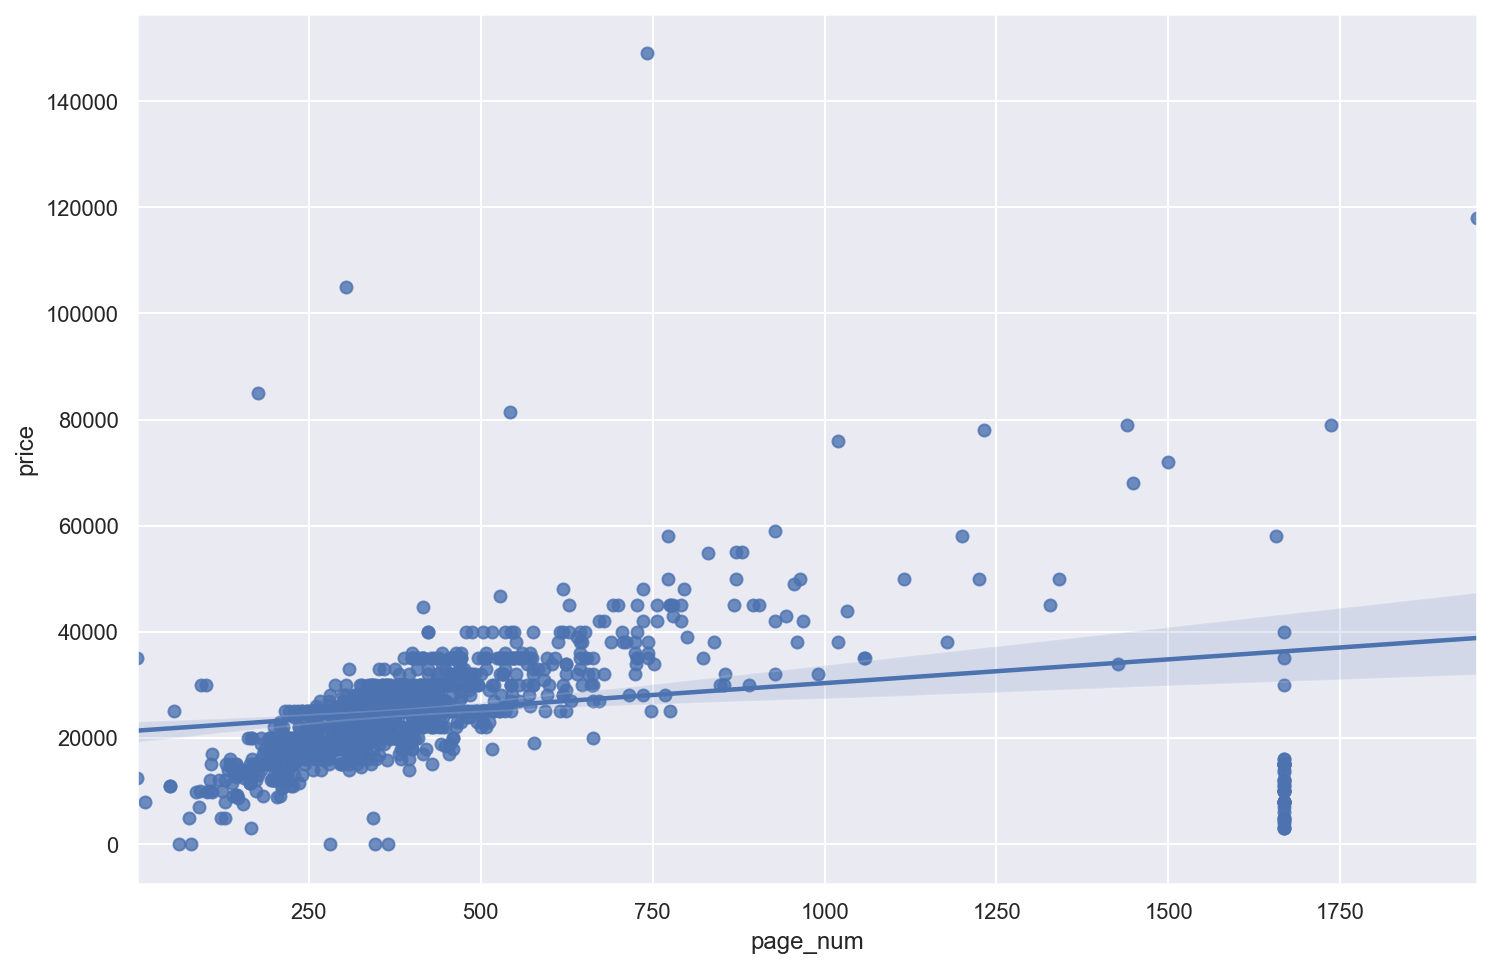

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
sns.regplot(x='page_num', y='price', data=raw_data,)
plt.show()

In [3]:
raw_data[raw_data['price']>140000]

title   price publisher  \
861  CODECADEMY.COM PYTHON 2 가이드북 (인공지능 10만 양병 프로젝트)  149000     오미글로벌   

                         isbn  \
861  1196250243 9791196250249   

                                                  link  page_num  
861  http://book.naver.com/bookdb/book_detail.php?b...       742

In [4]:
raw_data['publisher'].value_counts()

에이콘출판    180
한빛미디어    106
위키북스      83
길벗        41
제이펍       40
        ... 
청어람아이      1
데이터에듀      1
반니         1
에피스테메      1
ITC        1
Name: publisher, Length: 200, dtype: int64

In [5]:
len(raw_data['publisher'].unique())

200

In [6]:
from matplotlib import font_manager
from matplotlib import rc

f_path = "C://Windows/Fonts/malgun.ttf"
f_name = font_manager.FontProperties(fname=f_path).get_name()

rc('font', family=f_name)

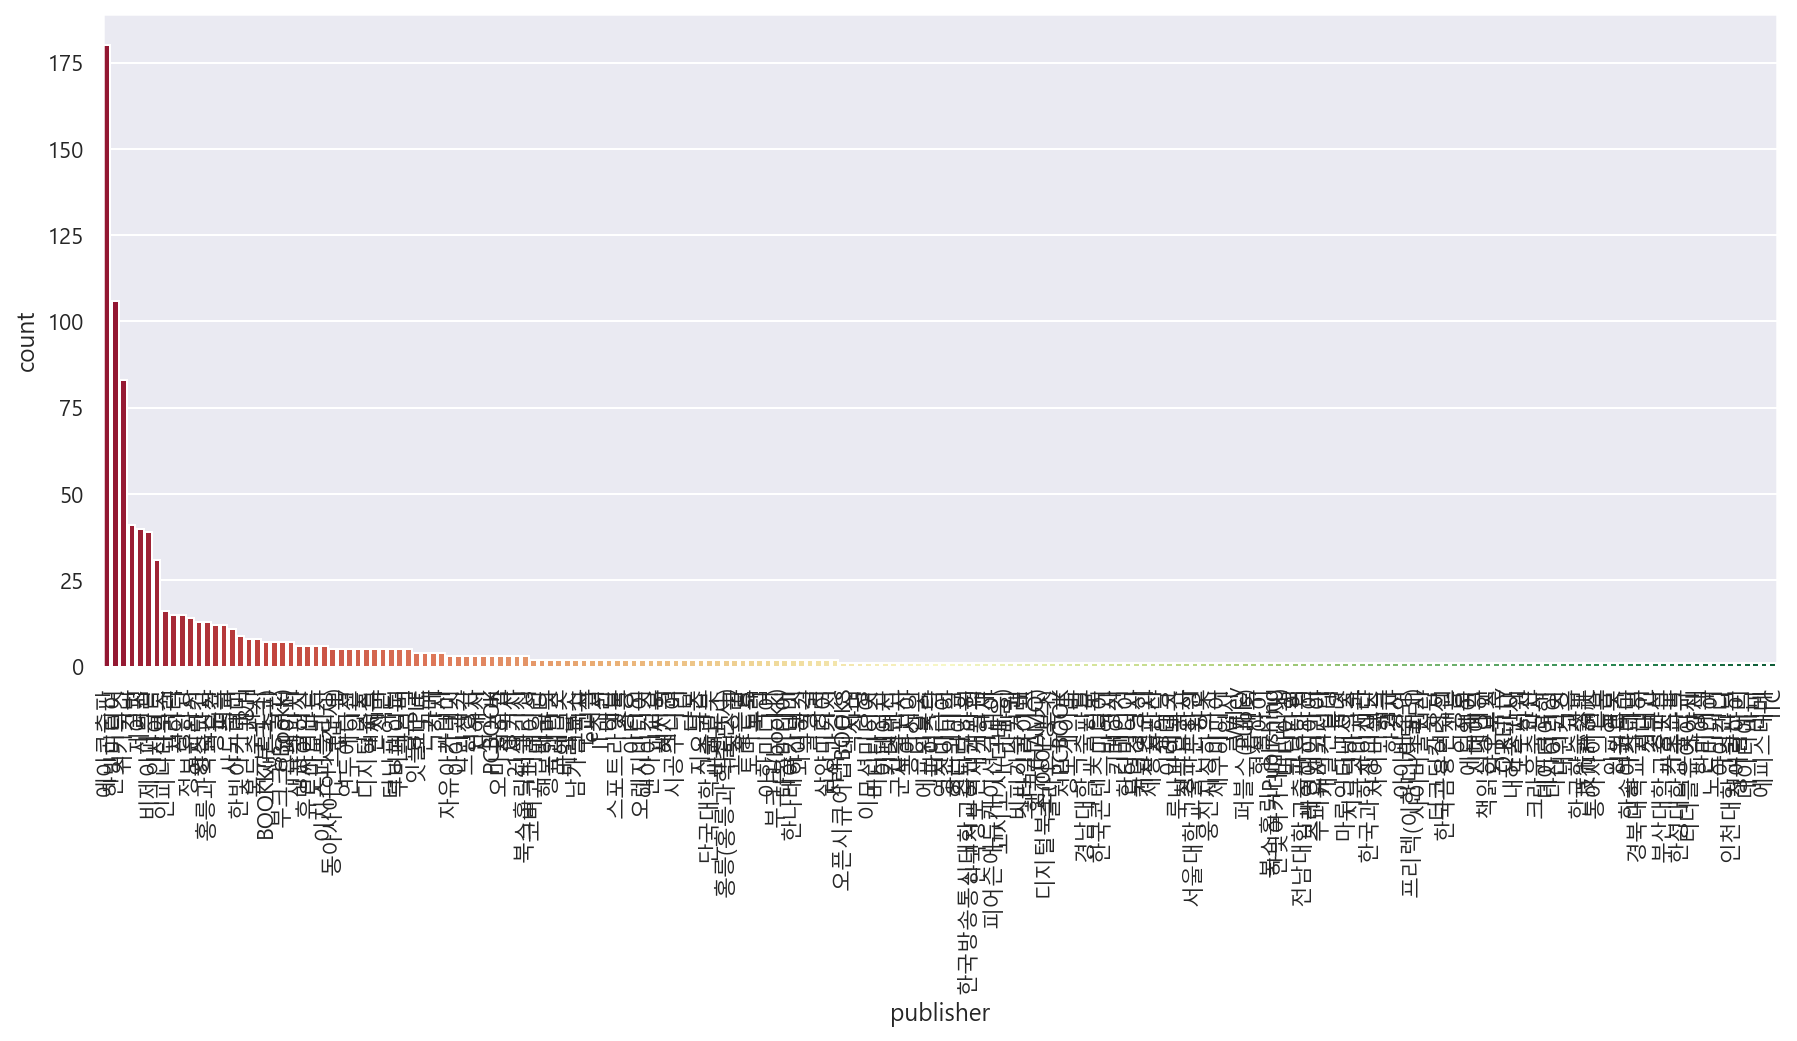

In [7]:
plt.figure(figsize=(15,6))
sns.countplot('publisher', data=raw_data, palette="RdYlGn", 
              order=raw_data['publisher'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

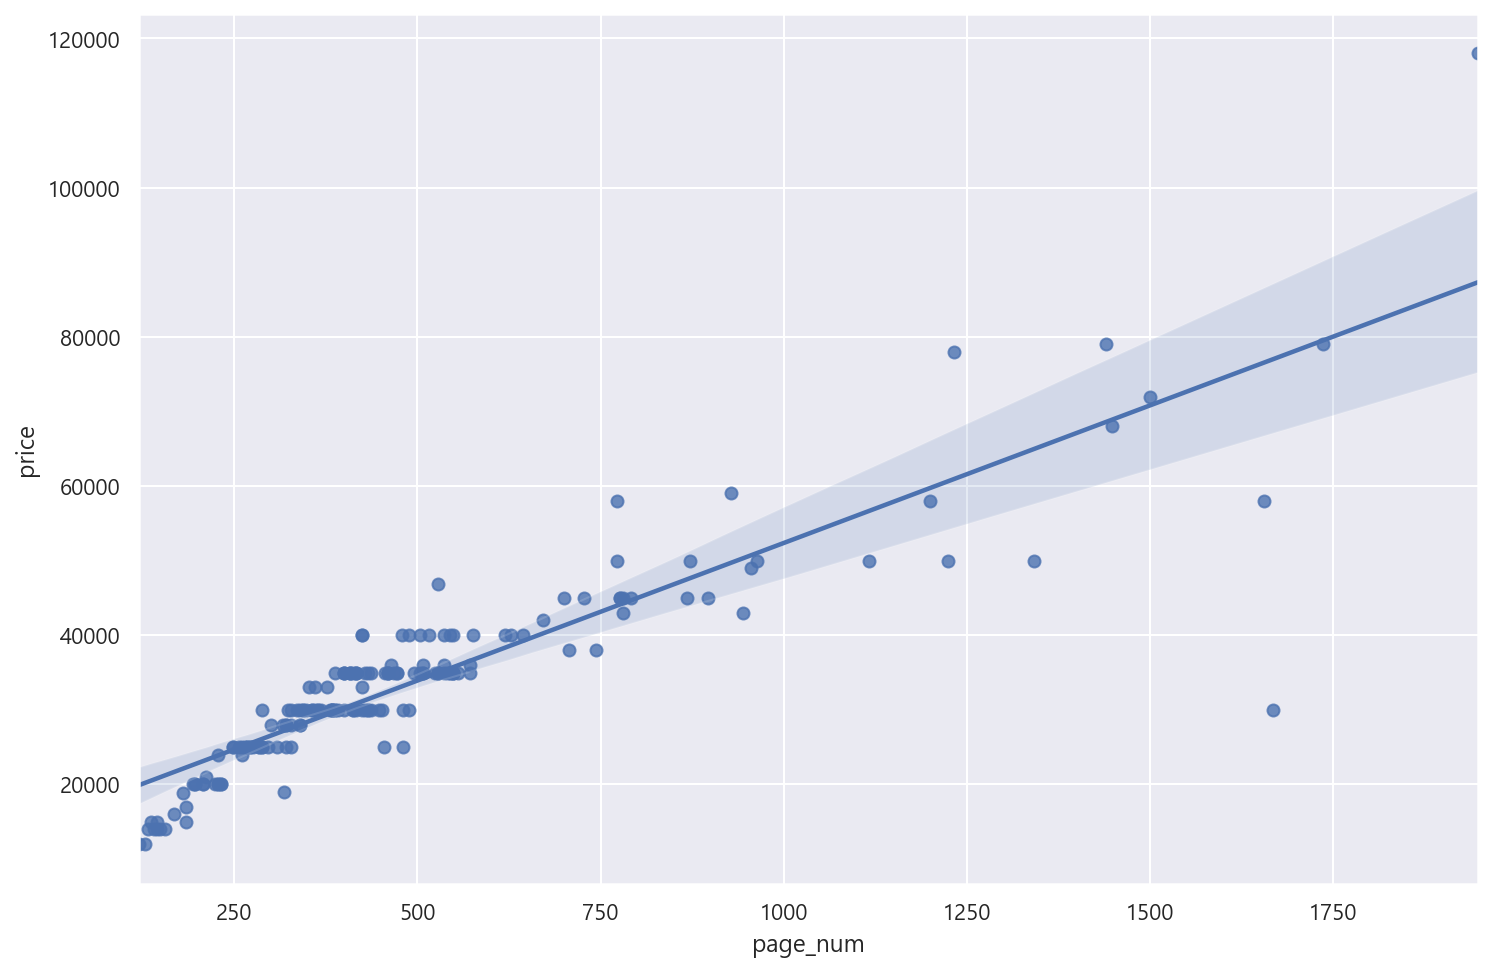

In [9]:
raw_1 = raw_data[raw_data['publisher']=='에이콘출판']
plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_1)
plt.show()

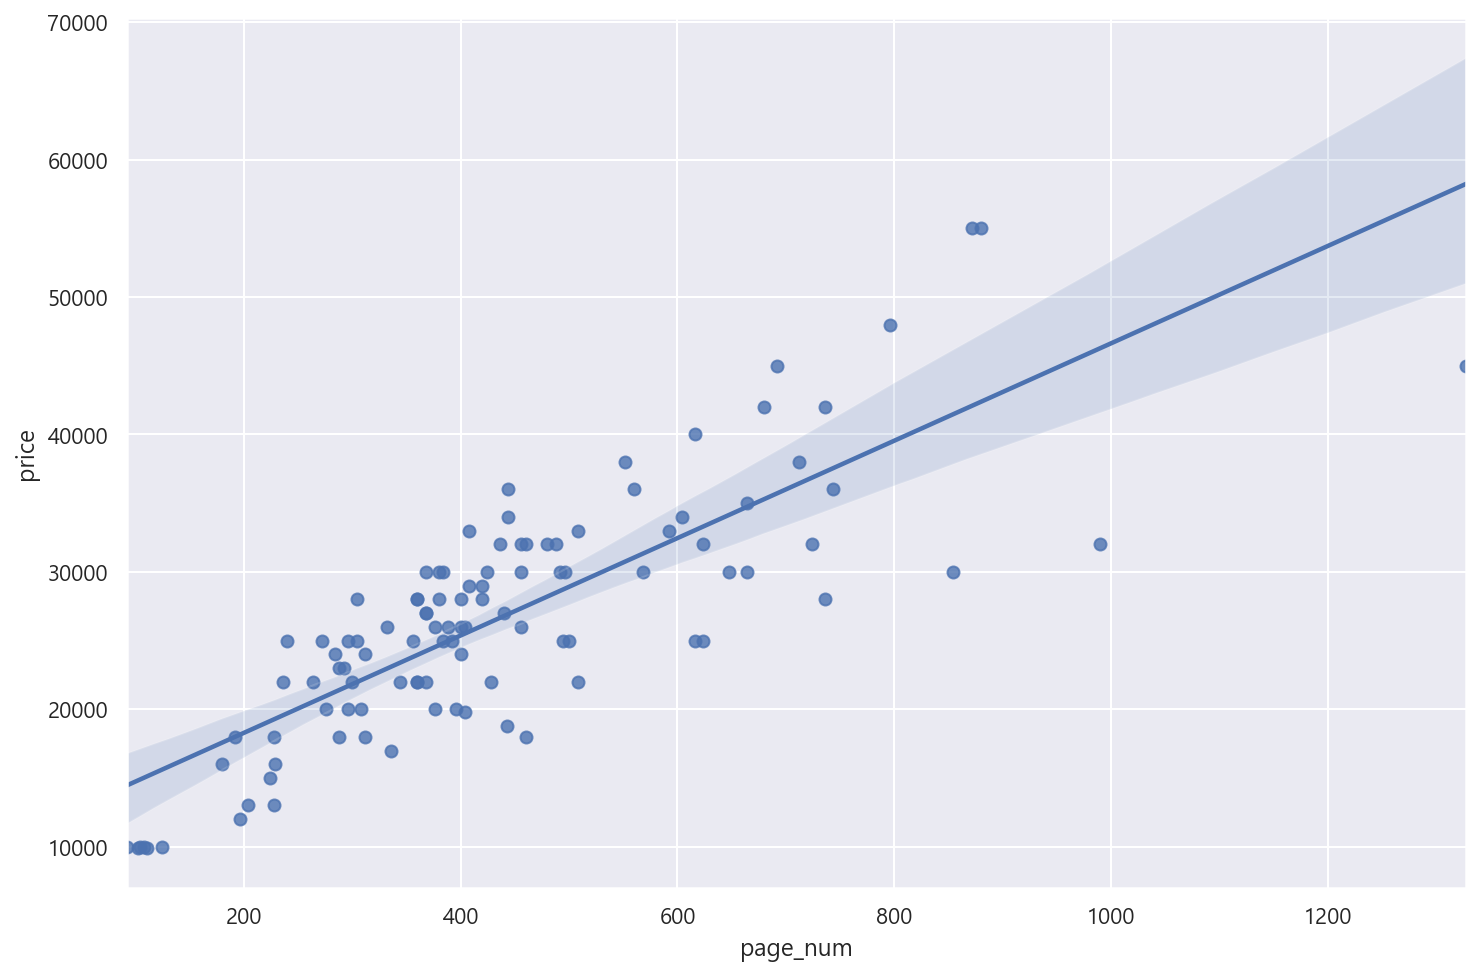

In [11]:
raw_2 = raw_data[raw_data['publisher']=='한빛미디어']
plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_2)
plt.show()

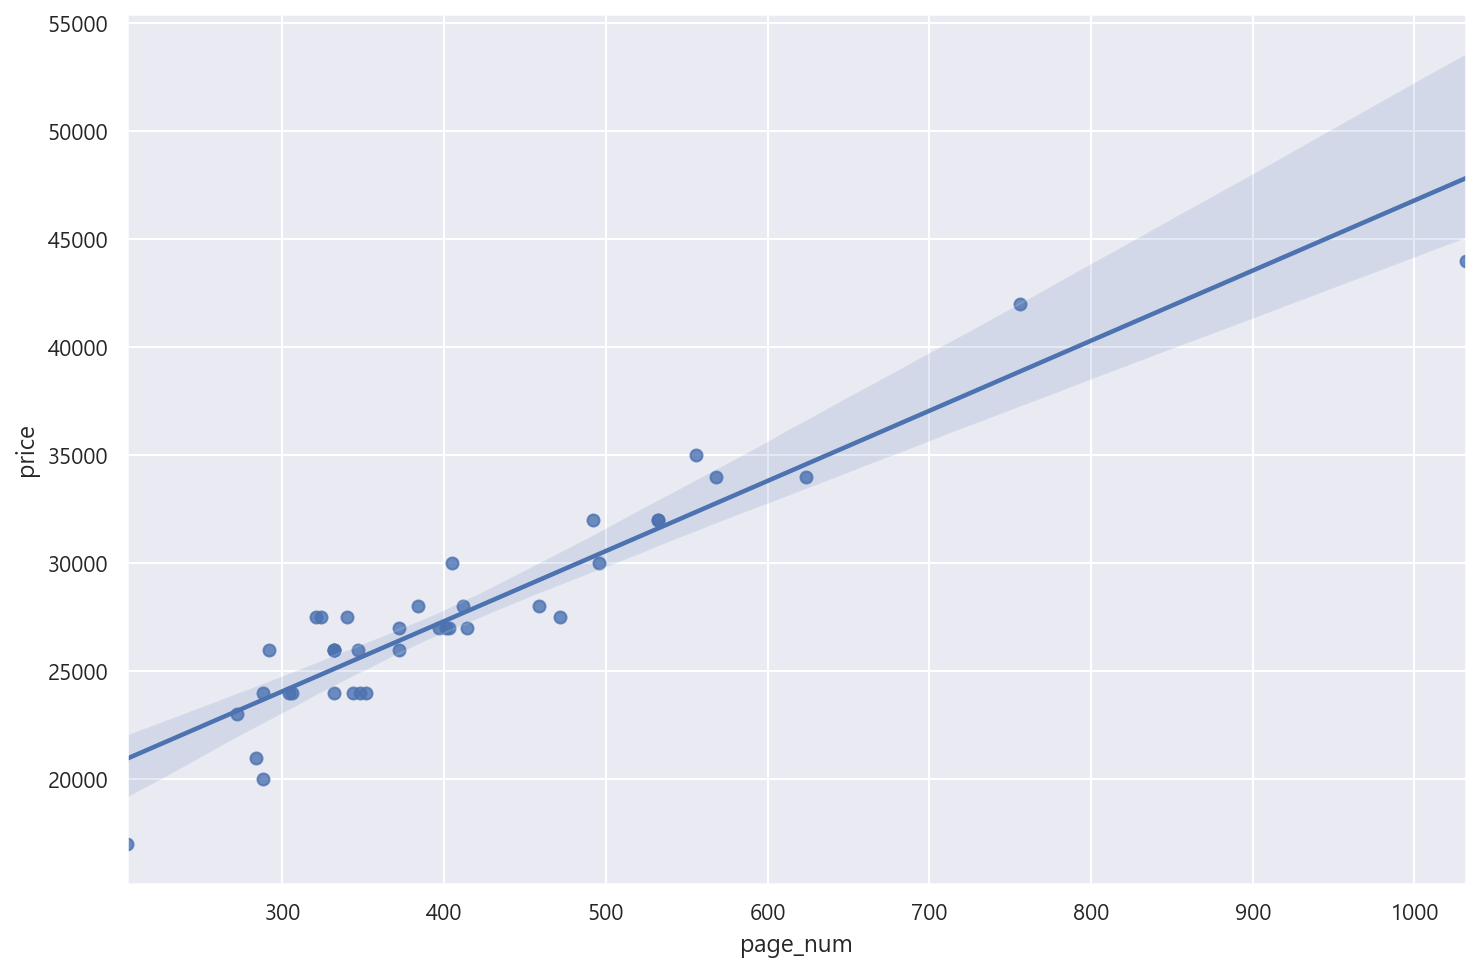

In [12]:
raw_3 = raw_data[raw_data['publisher']=='비제이퍼블릭']
plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_3)
plt.show()

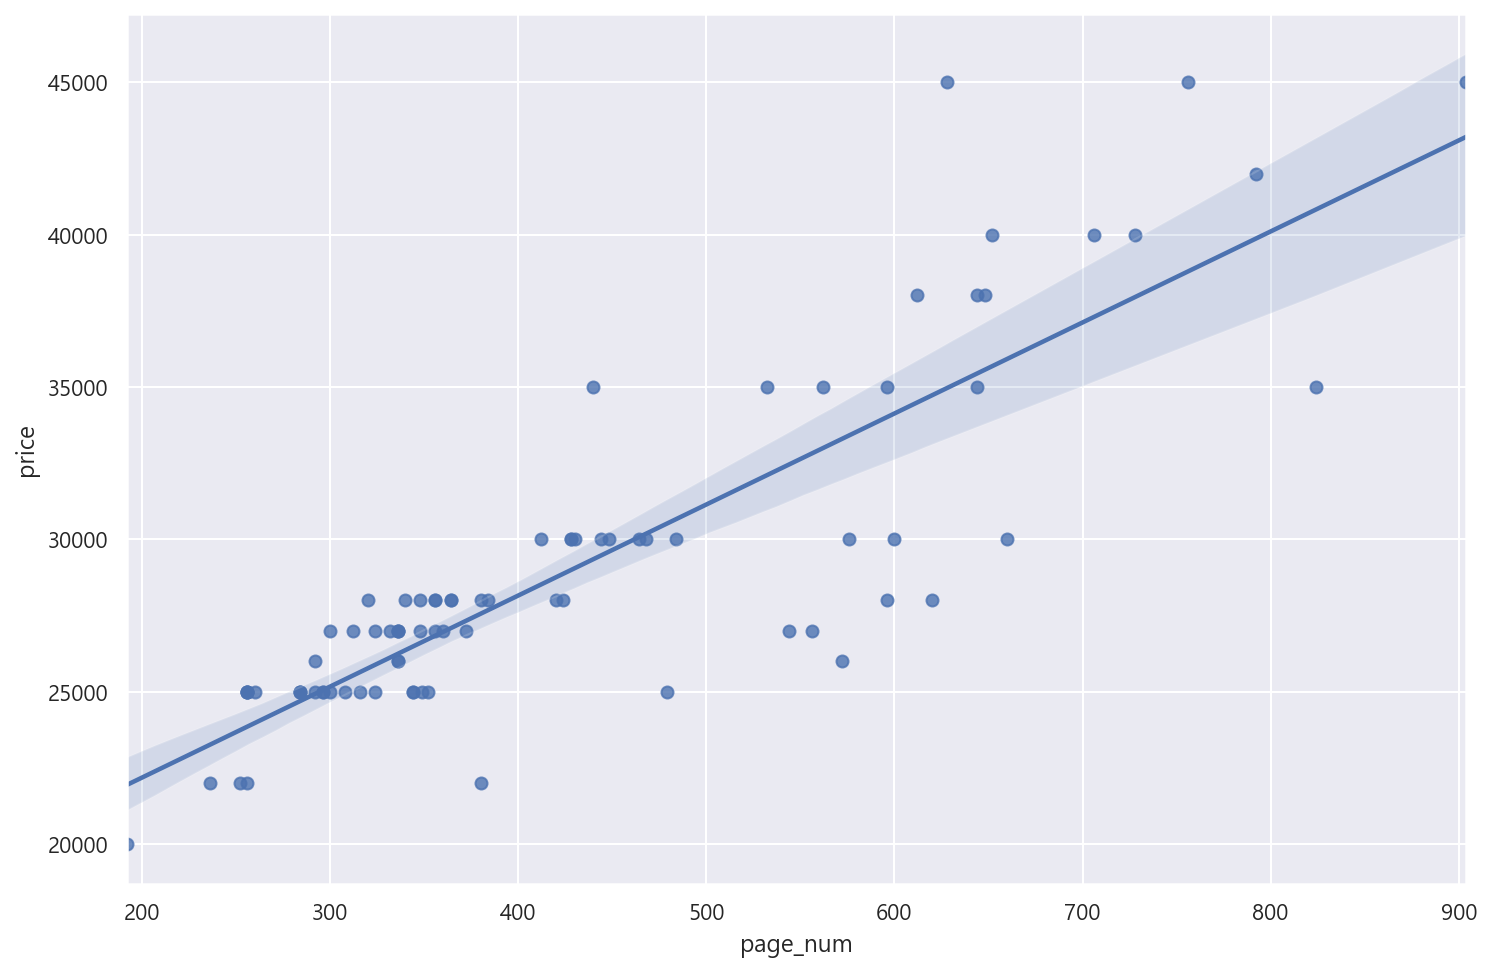

In [14]:
raw_4 = raw_data[raw_data['publisher']=='위키북스']
plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_4)
plt.show()

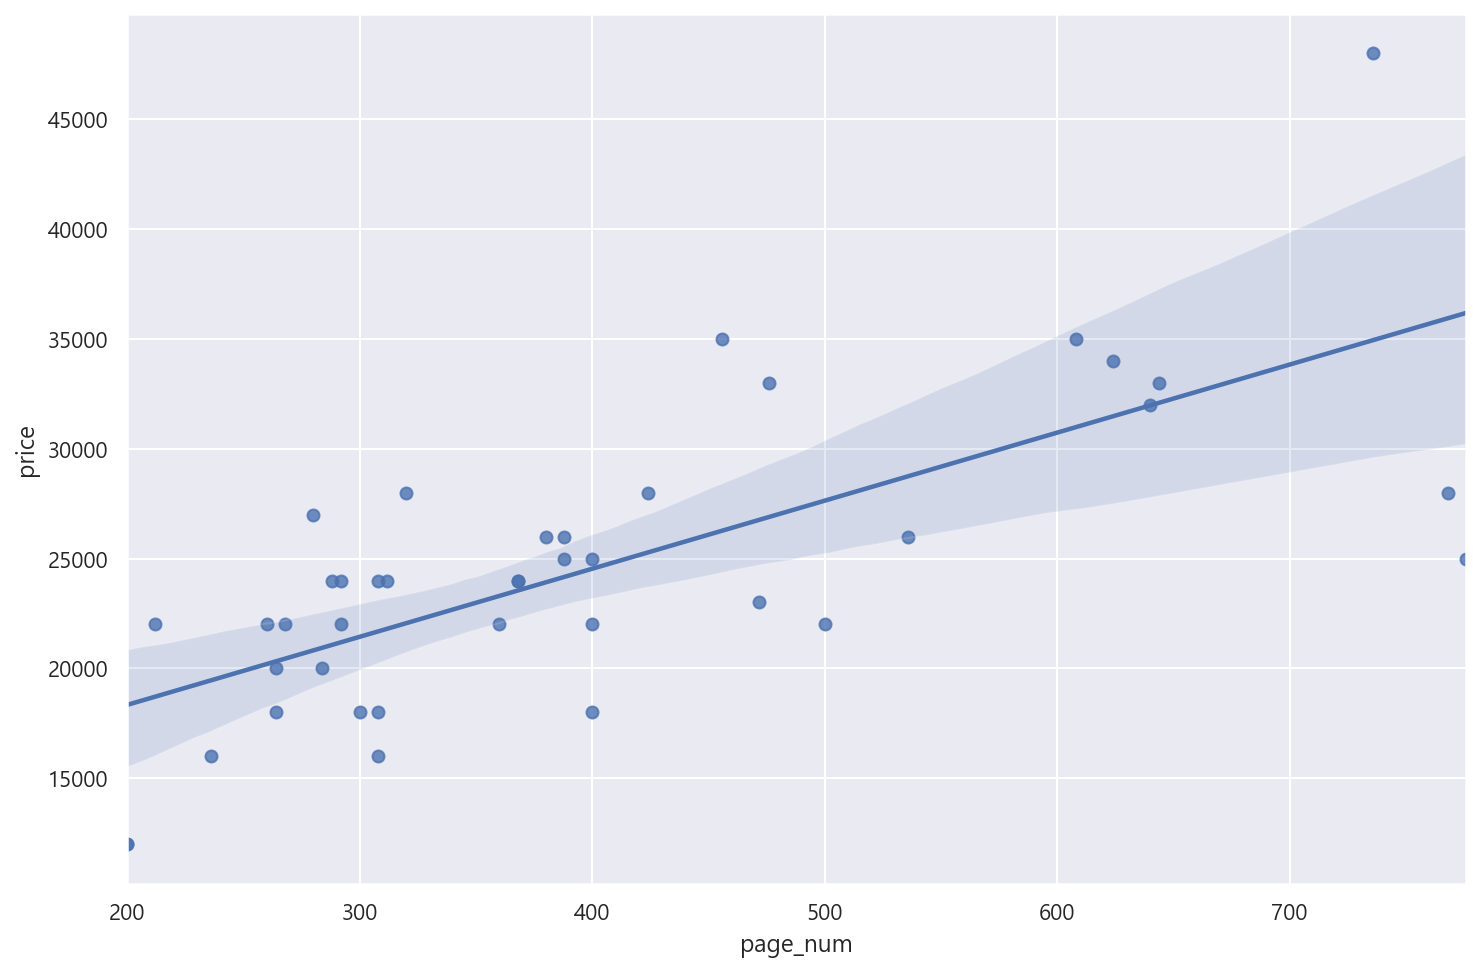

In [15]:
raw_5 = raw_data[raw_data['publisher']=='길벗']
plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_5)
plt.show()

In [16]:
import plotly.express as px

px.box(raw_data, y='price')

In [25]:
from sklearn.model_selection import train_test_split

X = raw_data['page_num'].values
y = raw_data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=13)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [26]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [27]:
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data :', rmse_tr)
print('RMSE of Test Data :', rmse_test)

RMSE of Train Data : 11206.938611995845
RMSE of Test Data : 11358.158682741603


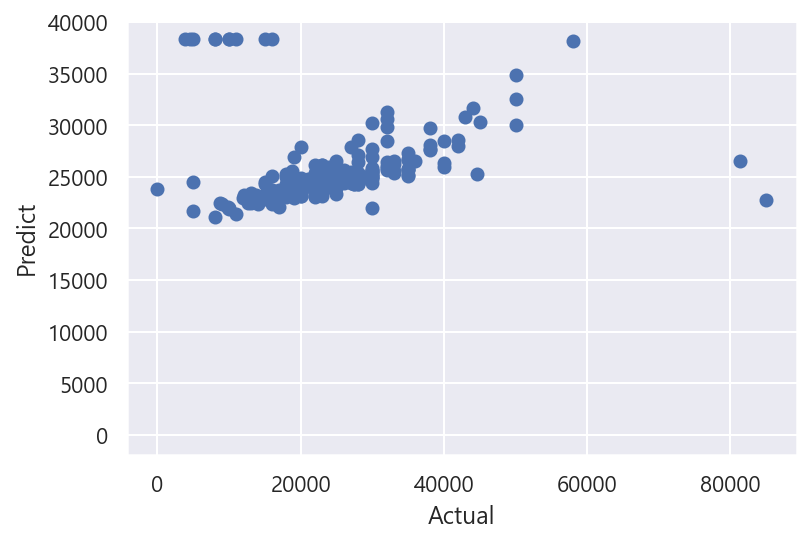

In [28]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.plot([0.80000], [0.80000], 'r')
plt.show()

In [29]:
X = raw_1['page_num'].values
X = raw_1['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=13)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

#reg.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [180, 1000]

In [24]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data :', rmse_tr)
print('RMSE of Test Data :', rmse_test)

RMSE of Train Data : 11206.938611995845
RMSE of Test Data : 11358.158682741603


In [ ]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.plot([0.120000], [0.120000], 'r')
plt.show()